In [1]:
%matplotlib inline
from __future__ import division
import matplotlib
import numpy as np
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
import h5py
import os
import re
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4)})
plotStyles={"markersize":20,"markeredgewidth":3.0,"linewidth":3.0}
stepStyles={"markersize":20,"markeredgewidth":3.0,"linewidth":3.0,"where":"post"}
np.seterr(divide='ignore',invalid='ignore')
pass

In [77]:
def addOrderParameter(filename, id, type, speciesIDs, speciesCoefficients):
    print "Adding order parameters to %s"%filename
    fp = h5py.File(filename, "r+")
    if "OrderParameters" not in fp.keys():
        opg = fp.create_group("/OrderParameters/%07d"%id)
        opg.attrs.create("ID", id, dtype=np.uint32)
        opg.attrs.create("Type", type, dtype=np.uint32)
        d1=opg.create_dataset("SpeciesIDs", (len(speciesIDs),), dtype=np.uint32)
        d1[:]=np.array(speciesIDs)
        d2=opg.create_dataset("SpeciesCoefficients", (len(speciesIDs),), dtype=double)
        d2[:]=np.array(speciesCoefficients)
    else:
        print "ERROR: file already has order parameters"
    fp.close()
    


### Execute with time limit.

In [154]:
%%bash
dirname=data/1
filename=${dirname}/bimolecular_with_order_parameter.lm
mkdir -p ${dirname}
rm -f ${filename} && lm_sbml_import ${filename} bimolecular_with_order_parameter.sbml
lm_setp ${filename} writeInterval=1e-2 maxTime=1e-1

lm_sbml_import v2016.01.20 build 1
Copyright (C) 2008-2012 Luthey-Schulten Group, University of Illinois at Urbana-Champaign.
Copyright (C) 2012-2016 Roberts Group, Johns Hopkins University.


Done.
lm_setp v2016.01.20 build 1
Copyright (C) 2008-2012 Luthey-Schulten Group,
University of Illinois at Urbana-Champaign.

Setting parameters in simulation file data/1/bimolecular_with_order_parameter.lm:
maxTime=1e-1
writeInterval=1e-2
Done.


In [155]:
dirname="data/1"
filename="%s/bimolecular_with_order_parameter.lm"%dirname
addOrderParameter(filename,0,2,(0,3),(1/1000,1/100))

Adding order parameters to data/1/bimolecular_with_order_parameter.lm


In [157]:
%%bash
dirname=data/1
filename=${dirname}/bimolecular_with_order_parameter.lm
echo "Execute the following command in `pwd`:"
#lmes -r 1-1 -f ${filename} -gr 0 -c 2
lmes -r 1-4 -f ${filename} -gr 0 -c 2 -sl lm::avx::GillespieDSolverAVX
#> ${filename}.log
echo "Finished."

Execute the following command in /Users/eroberts/Work/Lab/Git/LatticeMicrobesES/regression/bimolecular_with_order_parameter:
Lattice Microbe ES v2016.01.20 build 1 in 64-bit mode with options MPI AVX.
Copyright (C) 2008-2012 Luthey-Schulten Group, University of Illinois at Urbana-Champaign.
Copyright (C) 2012-2016 Roberts Group, Johns Hopkins University.

MPI version 3.0 with thread support MPI_THREAD_MULTIPLE.
Running with 1 process(es).

2016-01-09 11:25:43) Resource controller 0:1 started.
2016-01-09 11:25:43) Supervisor 0:2 started.
2016-01-09 11:25:43) Resource controller 0:1 on barkeri.bph.jhu.edu registered with 8 cpu core(s) and 0 gpu device(s).
2016-01-09 11:25:43) Registered resources for host barkeri.bph.jhu.edu (defaults=1): 2 cpu cores, 0 gpu devices
2016-01-09 11:25:43) All resources registered with supervisor, starting workers.
2016-01-09 11:25:43) Reserved core 0 on 0:1 for the output writer.
2016-01-09 11:25:43) Creating slot 0 on process (0:1) using resources: barkeri

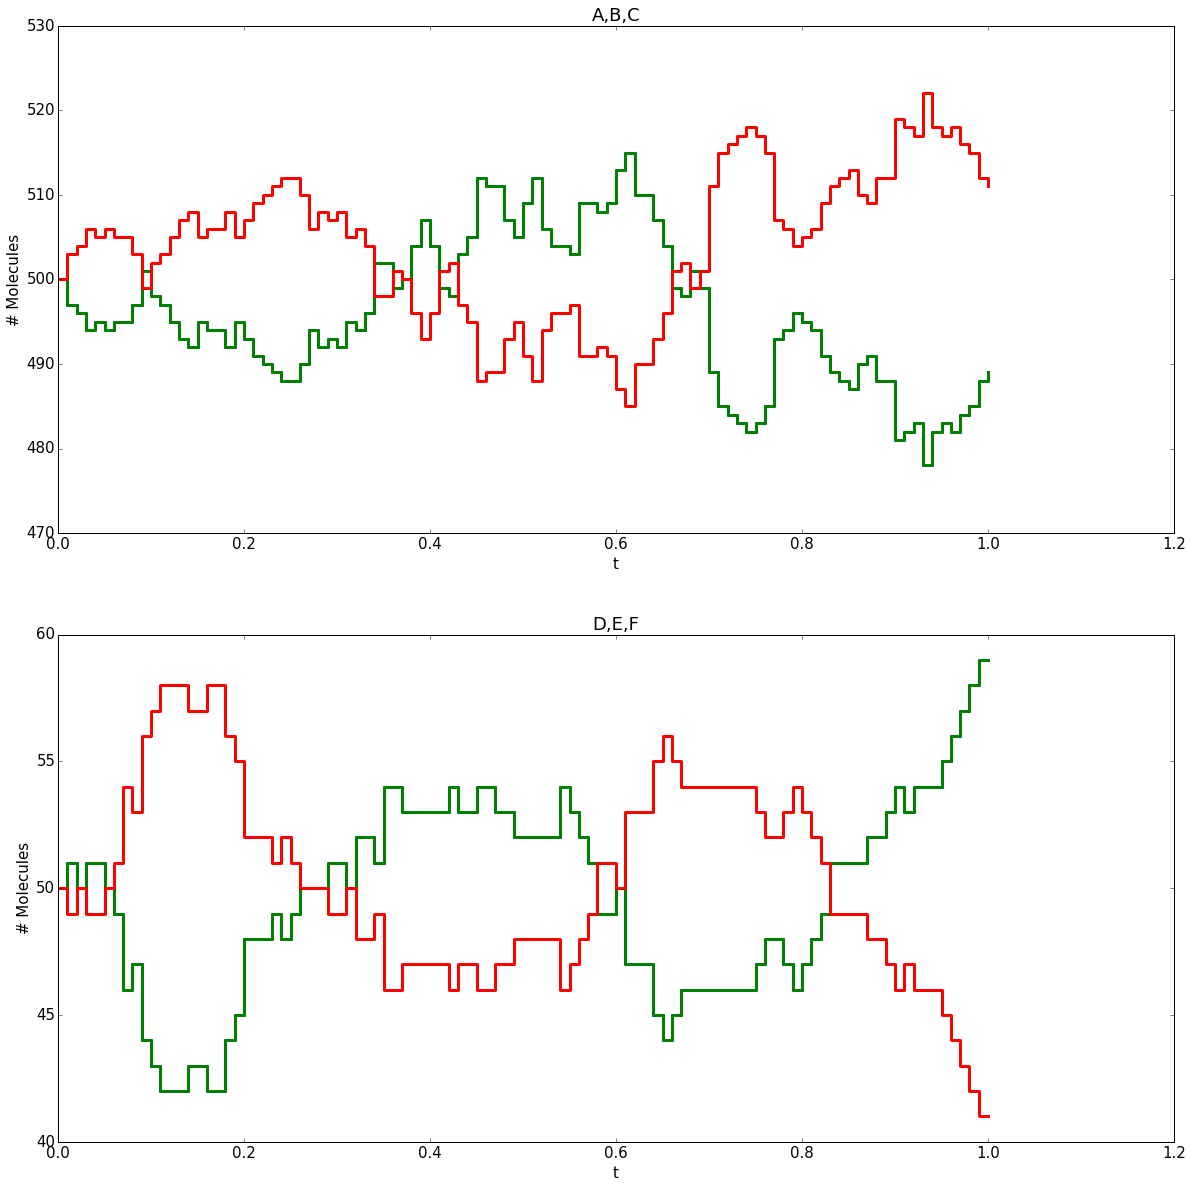

In [129]:
# Plot the time series for a single replicate.
dirname="data/1"
filename="%s/bimolecular_with_order_parameter.lm"%dirname
fp = h5py.File(filename, "r")
matplotlib.rcParams.update({'font.size': 15, "figure.figsize": (20,20)})
for replicate in (1,):
    counts=np.array(fp["/Simulations/%07d/SpeciesCounts"%replicate], dtype=double)
    times=np.array(fp["/Simulations/%07d/SpeciesCountTimes"%replicate], dtype=double)
    plt.subplot(2,1,1)
    step(times,counts[:,0], **stepStyles)
    step(times,counts[:,1], **stepStyles)
    step(times,counts[:,2], **stepStyles)
    xlabel('t'); ylabel('# Molecules'); title("A,B,C")
    plt.subplot(2,1,2)
    step(times,counts[:,3], **stepStyles)
    step(times,counts[:,4], **stepStyles)
    step(times,counts[:,5], **stepStyles)
    xlabel('t'); ylabel('# Molecules'); title("D,E,F")
pass

### Performance comparison
Generate the input files and output the commands to run the simulations.

In [158]:
%%bash
dirname=data/perf.99.latest
filename=${dirname}/bimolecular_with_order_parameter.lm
mkdir -p ${dirname}
rm -f ${filename} && lm_sbml_import ${filename} bimolecular_with_order_parameter.sbml
lm_setp ${filename} writeInterval=1e4 maxTime=1e5

lm_sbml_import v2016.01.20 build 1
Copyright (C) 2008-2012 Luthey-Schulten Group, University of Illinois at Urbana-Champaign.
Copyright (C) 2012-2016 Roberts Group, Johns Hopkins University.


Done.
lm_setp v2016.01.20 build 1
Copyright (C) 2008-2012 Luthey-Schulten Group,
University of Illinois at Urbana-Champaign.

Setting parameters in simulation file data/perf.99.latest/bimolecular_with_order_parameter.lm:
maxTime=1e5
writeInterval=1e4
Done.


In [159]:
dirname="data/perf.99.latest"
filename="%s/bimolecular_with_order_parameter.lm"%dirname
addOrderParameter(filename,0,2,(0,3),(1/1000,1/100))

Adding order parameters to data/perf.99.latest/bimolecular_with_order_parameter.lm


In [147]:
%%bash
dirname=data/perf.99.latest
filename=${dirname}/bimolecular_with_order_parameter.lm
echo "Execute the following command in `pwd`:"
echo 'for replicate in `seq -f "%g" 0 10`; do'
echo "echo Running \${replicate};"
#echo "hostname=\`hostname\`"
#echo "lmesPrefix=/share/git/LatticeMicrobesES/build/"
echo "hostname=barkeri"
echo "lmesPrefix="
#echo "hostname=marcc"
#echo "lmesPrefix=/home-2/erober32@jhu.edu/share/git/LatticeMicrobesES/build-icc/"
echo "\${lmesPrefix}lmes -r 1-16 -f ${filename} -c 2 -gr 0 -ff null -sl lm::cme::GillespieDSolver| tee ${filename}.\${hostname}.\${replicate}.log";
echo 'done;'

Execute the following command in /Users/eroberts/Work/Lab/Git/LatticeMicrobesES/regression/bimolecular_with_order_parameter:
for replicate in `seq -f "%g" 0 10`; do
echo Running ${replicate};
hostname=barkeri
lmesPrefix=
${lmesPrefix}lmes -r 1-15 -f data/perf.99.latest/bimolecular_with_order_parameter.lm -c 2 -gr 0 -ff null -sl lm::cme::GillespieDSolver| tee data/perf.99.latest/bimolecular_with_order_parameter.lm.${hostname}.${replicate}.log
done;


In [151]:
# Extract the timing data.
datadir="data"
timingData={}
testNumberMap={}
regex0 = re.compile("perf\.(\d+).(\S+)")
regex1 = re.compile("\.lm\.([^\.]+)\.(\d+)\.log")
regex2 = re.compile("Finished .+ seconds \((\S+) steps/second\)")
for dirname in os.listdir(datadir):
    testName = None
    m = regex0.search(dirname)
    if m != None:
        testNumber = m.group(1)
        testName = m.group(2)
        testNumberMap[testNumber] = testName
    if testName is not None:
        for logname in os.listdir(datadir+"/"+dirname):
            m = regex1.search(logname)
            if m != None:
                host=m.group(1)
                replicate=int(m.group(2))
                with open(datadir+"/"+dirname+"/"+logname) as f:
                    for line in f:
                        m = regex2.search(line)
                        if m != None:
                            if host not in timingData:
                                timingData[host]={}
                            if testName not in timingData[host]:
                                timingData[host][testName]=[]
                            timingData[host][testName].append(double(m.group(1)))
                            break

[15356363.636363637]


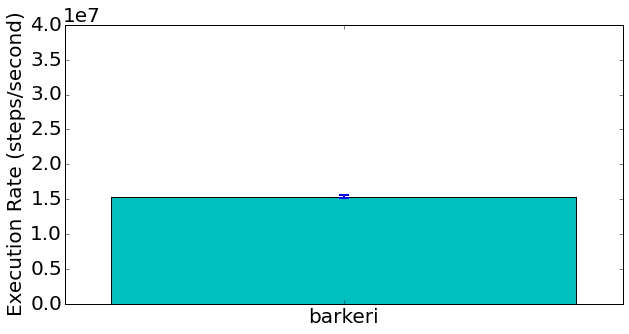

In [152]:
# Plot the latest timing data.
matplotlib.rcParams.update({'font.size': 20, "figure.figsize": (10,5)})
hosts = timingData.keys()
hosts.sort()
times=[]
timesErr=[]
for host in hosts:
    if "latest" in timingData[host]:
        times.append(mean(timingData[host]['latest']))
        timesErr.append(std(timingData[host]['latest']))
print times
plt.bar(arange(0,len(hosts))+0.25,times,width=0.5,yerr=timesErr, color='c', error_kw={"elinewidth":2,"capsize":5,"capthick":2})
plt.ylabel('Execution Rate (steps/second)')
plt.xticks(arange(0,len(hosts))+0.5, hosts)
plt.ylim([0,4e7])
pass

[17564545.454545453, 14485454.545454545, 15060909.090909092, 15356363.636363637]


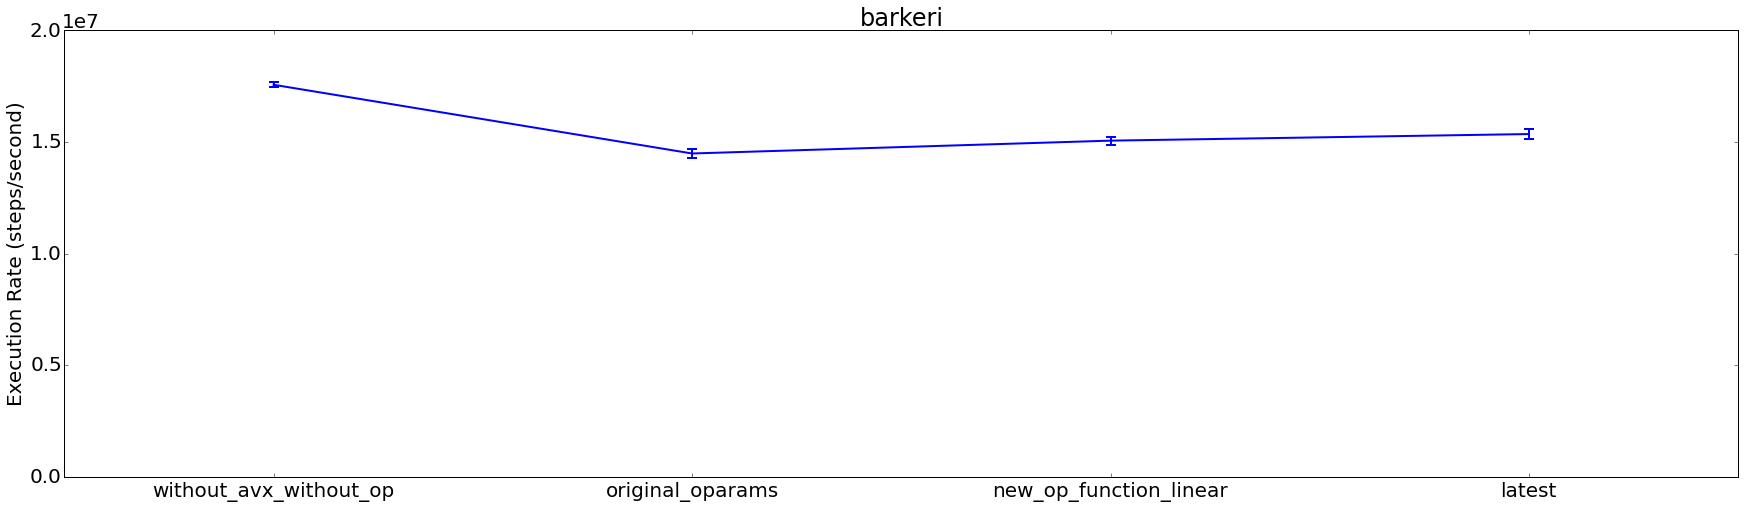

In [153]:
# Plot the previous timing data.
matplotlib.rcParams.update({'font.size': 20, "figure.figsize": (30,8)})
hosts = timingData.keys()
hosts.sort()
testNumbers = testNumberMap.keys()
testNumbers.sort()
for i,host in enumerate(hosts):
    times=[]
    timesErr=[]
    testNames=[]
    for testNumber in testNumbers:
        testName = testNumberMap[testNumber]
        if testName in timingData[host]:
            times.append(mean(timingData[host][testName]))
            timesErr.append(std(timingData[host][testName]))
            testNames.append(testName)
    plt.subplot(len(hosts),1,i+1)
    plt.errorbar(arange(0,len(testNames))+0.5,times,linewidth=2,yerr=timesErr,elinewidth=2,capsize=5,capthick=2)
    plt.ylabel('Execution Rate (steps/second)')
    plt.xticks(arange(0,len(testNames))+0.5, testNames)
    plt.xlim([0,len(testNames)]); plt.ylim([0,2e7])
    plt.title(host)
    print times
pass

### Performance comparison with AVX.

In [170]:
%%bash
dirname=data/perf_avx.99.latest
filename=${dirname}/bimolecular_with_order_parameter.lm
mkdir -p ${dirname}
rm -f ${filename} && lm_sbml_import ${filename} bimolecular_with_order_parameter.sbml
lm_setp ${filename} writeInterval=1e4 maxTime=1e5

lm_sbml_import v2016.01.20 build 1
Copyright (C) 2008-2012 Luthey-Schulten Group, University of Illinois at Urbana-Champaign.
Copyright (C) 2012-2016 Roberts Group, Johns Hopkins University.


Done.
lm_setp v2016.01.20 build 1
Copyright (C) 2008-2012 Luthey-Schulten Group,
University of Illinois at Urbana-Champaign.

Setting parameters in simulation file data/perf_avx.99.latest/bimolecular_with_order_parameter.lm:
maxTime=1e5
writeInterval=1e4
Done.


In [171]:
dirname="data/perf_avx.99.latest"
filename="%s/bimolecular_with_order_parameter.lm"%dirname
addOrderParameter(filename,0,2,(0,3),(1/1000,1/100))

Adding order parameters to data/perf_avx.99.latest/bimolecular_with_order_parameter.lm


In [172]:
%%bash
dirname=data/perf_avx.99.latest
filename=${dirname}/bimolecular_with_order_parameter.lm
echo "Execute the following command in `pwd`:"
echo 'for replicate in `seq -f "%g" 0 10`; do'
echo "echo Running \${replicate};"
#echo "hostname=\`hostname\`"
#echo "lmesPrefix=/share/git/LatticeMicrobesES/build/"
echo "hostname=barkeri"
echo "lmesPrefix="
#echo "hostname=marcc"
#echo "lmesPrefix=/home-2/erober32@jhu.edu/share/git/LatticeMicrobesES/build-icc/"
echo "\${lmesPrefix}lmes -r 1-16 -f ${filename} -c 2 -gr 0 -ff null -sl lm::avx::GillespieDSolverAVX| tee ${filename}.\${hostname}.\${replicate}.log";
echo 'done;'

Execute the following command in /Users/eroberts/Work/Lab/Git/LatticeMicrobesES/regression/bimolecular_with_order_parameter:
for replicate in `seq -f "%g" 0 10`; do
echo Running ${replicate};
hostname=barkeri
lmesPrefix=
${lmesPrefix}lmes -r 1-16 -f data/perf_avx.99.latest/bimolecular_with_order_parameter.lm -c 2 -gr 0 -ff null -sl lm::avx::GillespieDSolverAVX| tee data/perf_avx.99.latest/bimolecular_with_order_parameter.lm.${hostname}.${replicate}.log
done;


In [173]:
# Extract the timing data.
datadir="data"
timingData={}
testNumberMap={}
regex0 = re.compile("perf_avx\.(\d+).(\S+)")
regex1 = re.compile("\.lm\.([^\.]+)\.(\d+)\.log")
regex2 = re.compile("Finished .+ seconds \((\S+) steps/second\)")
for dirname in os.listdir(datadir):
    testName = None
    m = regex0.search(dirname)
    if m != None:
        testNumber = m.group(1)
        testName = m.group(2)
        testNumberMap[testNumber] = testName
    if testName is not None:
        for logname in os.listdir(datadir+"/"+dirname):
            m = regex1.search(logname)
            if m != None:
                host=m.group(1)
                replicate=int(m.group(2))
                with open(datadir+"/"+dirname+"/"+logname) as f:
                    for line in f:
                        m = regex2.search(line)
                        if m != None:
                            if host not in timingData:
                                timingData[host]={}
                            if testName not in timingData[host]:
                                timingData[host][testName]=[]
                            timingData[host][testName].append(double(m.group(1)))
                            break

[26211818.181818184]


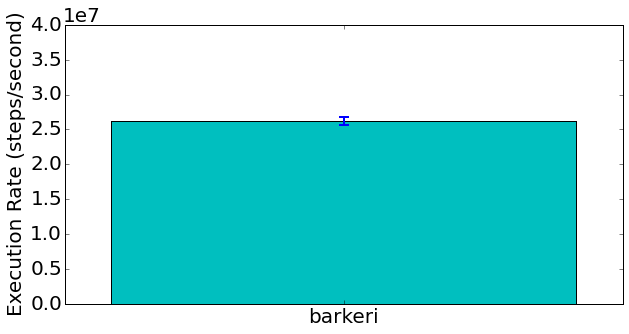

In [174]:
# Plot the latest timing data.
matplotlib.rcParams.update({'font.size': 20, "figure.figsize": (10,5)})
hosts = timingData.keys()
hosts.sort()
times=[]
timesErr=[]
for host in hosts:
    if "latest" in timingData[host]:
        times.append(mean(timingData[host]['latest']))
        timesErr.append(std(timingData[host]['latest']))
print times
plt.bar(arange(0,len(hosts))+0.25,times,width=0.5,yerr=timesErr, color='c', error_kw={"elinewidth":2,"capsize":5,"capthick":2})
plt.ylabel('Execution Rate (steps/second)')
plt.xticks(arange(0,len(hosts))+0.5, hosts)
plt.ylim([0,4e7])
pass

[27556363.636363637, 26211818.181818184]


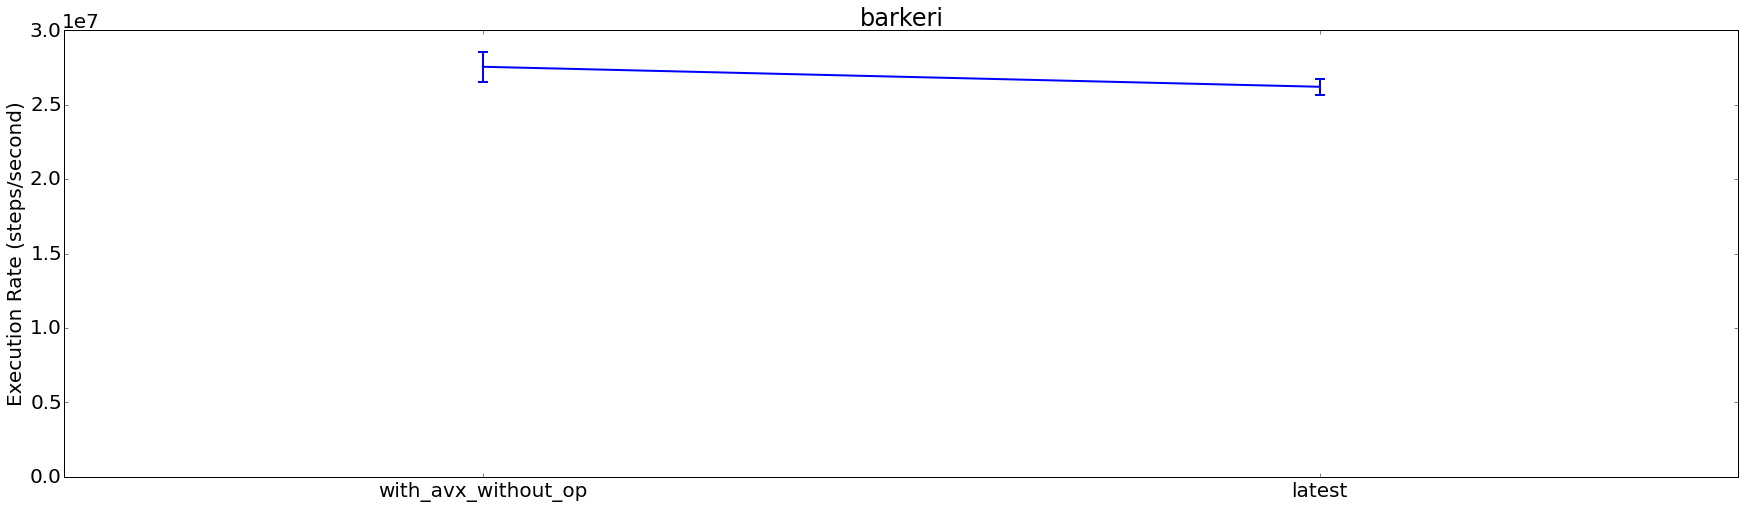

In [175]:
# Plot the previous timing data.
matplotlib.rcParams.update({'font.size': 20, "figure.figsize": (30,8)})
hosts = timingData.keys()
hosts.sort()
testNumbers = testNumberMap.keys()
testNumbers.sort()
for i,host in enumerate(hosts):
    times=[]
    timesErr=[]
    testNames=[]
    for testNumber in testNumbers:
        testName = testNumberMap[testNumber]
        if testName in timingData[host]:
            times.append(mean(timingData[host][testName]))
            timesErr.append(std(timingData[host][testName]))
            testNames.append(testName)
    plt.subplot(len(hosts),1,i+1)
    plt.errorbar(arange(0,len(testNames))+0.5,times,linewidth=2,yerr=timesErr,elinewidth=2,capsize=5,capthick=2)
    plt.ylabel('Execution Rate (steps/second)')
    plt.xticks(arange(0,len(testNames))+0.5, testNames)
    plt.xlim([0,len(testNames)]); plt.ylim([0,3e7])
    plt.title(host)
    print times
pass